https://intellipaat.com/blog/fraud-detection-machine-learning-algorithms/

https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook

https://www.kaggle.com/code/netzone/eda-and-fraud-detection

https://www.kaggle.com/code/benroshan/transaction-fraud-detection#%F0%9F%93%8B-Pivot-table-analysis

https://www.kaggle.com/code/ataboydata/fraud-detection-with-different-methods

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Source dataset: https://www.kaggle.com/datasets/ealaxi/paysim1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /Customer_Analysis/PS_20174392719_1491204439457_log.csv")
print('Shape: ',df.shape)
df.head()

Shape:  (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Seem likes dataset has been preprocessed. Its kinda clear

Key Takeaways:

There are no missing values

There are just over 6 million observations

There are 11 variables

Most transactions involve amounts less than 1 million euros.

Most observations in the dataset are of valid transactions, so any patterns related to identifying fraud transactions may be hard to see, data is also unbalanced.

From the sample of observations, there are many instances where what happens to the recipient account (oldbalanceDest, newbalanceDest) does not make sense (e.g. the very first observation involved a payment of 9839.64 yet, the balance before and after the transaction equals 0.)

Responding to takeaways

No imputation is required until further notice

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

Dimension Reduction methods may not be necessary

(and points 5, 6) Since the data is unbalanced I want to visually compare fraud transactions to valid transactions and see if there are any important patterns that could be useful.

# Explotary Data Analysis

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df_pivot=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
df_pivot.style.background_gradient(cmap=cm)

 From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds (amount 200k transactions) being triggered.

In [ ]:
print('isFraud counts:\n',df['isFraud'].value_counts())
print('isFlaggedFraud counts:\n',df['isFlaggedFraud'].value_counts())

isFraud counts:
 0    6354407
1       8213
Name: isFraud, dtype: int64
isFlaggedFraud counts:
 0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


Look at this skewed show that how dataset imbalanced is =))

In [ ]:
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


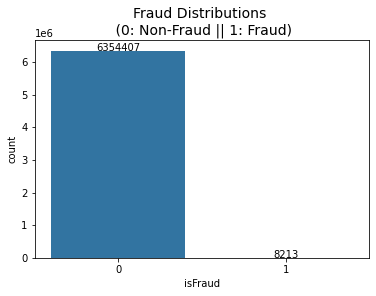

In [ ]:
sns.countplot('isFraud', data=df)
plt.title('Fraud Distributions \n (0: Non-Fraud || 1: Fraud)', fontsize=14)
value_counts = df['isFraud'].value_counts()

# Iterate over the value counts and add them to the plot
for i, count in enumerate(value_counts):
    plt.text(i, count+100, count, ha='center')  

plt.show()

The original dataset is imbalanced between Fraud and non-Fraud, most of them are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are non-fraud.

## FlaggedFraud

Now let see whether which type have only 16 FlaggedFraud in 6 milion transactions =))

In [ ]:
print('The types of flagged fraudulent transactions are {}'.format(list(df.loc[df['isFlaggedFraud'] == 1].type.drop_duplicates().values)))

The types of flagged fraudulent transactions are ['TRANSFER']


In [ ]:
print('The number of flagged fraudulent TRANSFER = {}'.format(len(df.loc[(df['isFlaggedFraud'] == 1) & (df['type'] == 'TRANSFER')])))

The number of flagged fraudulent TRANSFER = 16


In [ ]:
flagged = df.loc[df["isFlaggedFraud"] == 1] #observation
flagged_correctly = sum(flagged["isFraud"] == 1) #number of transactions is actual fraud and flagged
flagged_wrongly = len(flagged) - flagged_correctly
print(flagged_correctly,"observations were flagged correctly and", flagged_wrongly, \
      "observations were flagged wrongly for a total of", len(flagged), "flagged observations.")

# how many observations where the transaction is fraudulent, the transaction is a transfer
# and the amount is greater than 200.000 are in the dataset
should_be_flagged = df.loc[df["isFraud"] == 1][(df.loc[df["isFraud"] == 1]["amount"] > 200000) & (df.loc[df["isFraud"] == 1]["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

16 observations were flagged correctly and 0 observations were flagged wrongly for a total of 16 flagged observations.
number of observations that should be flagged:  2740


In [ ]:
dfTransfer = df.loc[df["type"] == 'TRANSFER']
dfFlagged = df.loc[df["isFlaggedFraud"] == 1]
dfNotFlagged = df.loc[df["isFlaggedFraud"] == 0]

print('Min amount transacted when isFlaggedFraud is set = {}'.format(dfFlagged["amount"].min()))

print('Max amount transacted in a TRANSFER where isFlaggedFraud is not set =\
 {}'.format(dfTransfer.loc[dfTransfer["isFlaggedFraud"] == 0]["amount"].max()))

Min amount transacted when isFlaggedFraud is set = 353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set = 92445516.64


In [ ]:
print('Have originators of transactions flagged as fraud transacted more than once? {}'\
.format((dfFlagged["nameOrig"].isin(pd.concat([dfNotFlagged["nameOrig"], dfNotFlagged["nameDest"]]))).any()))

print('Have destinations for transactions flagged as fraud initiated other transactions? \
{}'.format((dfFlagged["nameDest"].isin(dfNotFlagged["nameOrig"])).any()))
# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been destination accounts more than once,
# Clearly 'isFlaggedFraud' being set is independent of whether a destination account has been used before or not

print('How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: {}'\
.format(sum(dfFlagged["nameDest"].isin(dfNotFlagged["nameDest"])))) 

Have originators of transactions flagged as fraud transacted more than once? False
Have destinations for transactions flagged as fraud initiated other transactions? False
How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


So it looks the simulation can flag only 16 transfer transactions as fraud. Let's look at those records and compare with the records which the system cannot catch'em.

The plot below will also focus only on transfer transaction type.

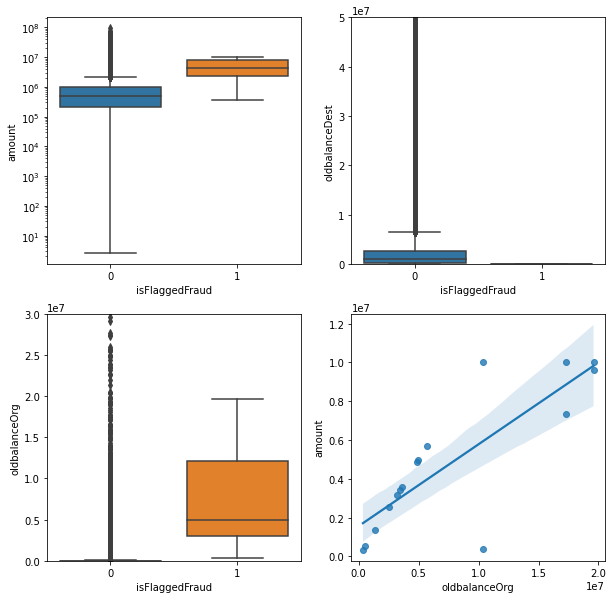

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df['type'] == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

Conclusion:

In a modified dataset with more than 2 million observations, a variable that brings attention to only 16 observations is insignificant.

Furthermore, the number of transactions that should have been flagged(16) far exceeds the number of observations that were actually flagged(2740).

For that reason, I am omitting the isFlaggedFraud column from the analysis.

## Account type

One feature of the dataset that is not immediately presented on the kaggle overview page is the account types "C" (customer) and "M" (Merchant), which would be the first character for each value under nameOrig and nameDest. Could this be a predictor?

In [ ]:
data_account = df.copy() # creating copy of dataset in case I need original dataset
data_account["type1"] = np.nan # initializing feature column

# filling feature column
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('C'),"type1"] = "CC" 
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('M'),"type1"] = "CM"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('C'),"type1"] = "MC"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('M'),"type1"] = "MM"

In [ ]:
# seeing the counts of transactions by type1 (CC,CM,MC,MM)
type_account = data_account['type1'].value_counts()
fraud_type_account = data_account[data_account["isFraud"] == 1]["type1"].value_counts()
non_fraud_type_account = data_account[data_account["isFraud"] == 0]["type1"].value_counts()

print("Account types count: \n", type_account)
print("\nFraud transactions by type1: \n", fraud_type_account)
print("\nValid transactions by type1: \n", non_fraud_type_account)

Account types count: 
 CC    4211125
CM    2151495
Name: type1, dtype: int64

Fraud transactions by type1: 
 CC    8213
Name: type1, dtype: int64

Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: type1, dtype: int64


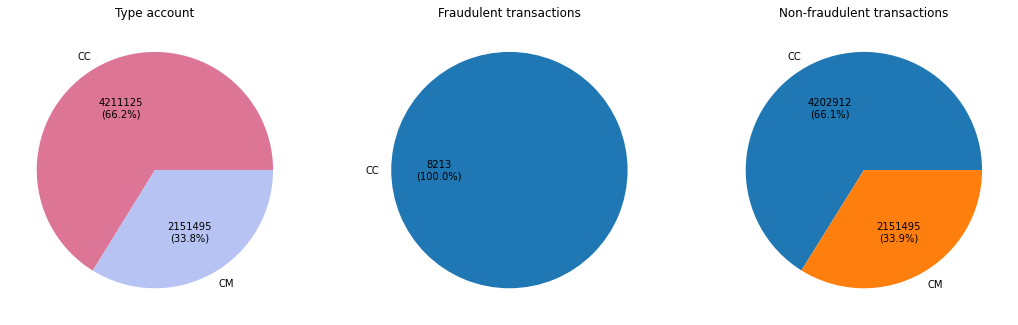

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,10))

# add count values to autopct string
fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(fraud_type_account.values)/100, p)
non_fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(non_fraud_type_account.values)/100, p)
type_account_autpct = lambda p:'{:.0f}\n({:.1f}%)'.format(p * sum(type_account.values)/100, p)

ax[0].pie(type_account.values, labels = type_account.index, autopct = type_account_autpct, colors = ['#DD7596', '#B7C3F3'])
ax[0].set_title('Type account')

ax[1].pie(fraud_type_account.values, labels=fraud_type_account.index, autopct=fraud_autopct)
ax[1].set_title('Fraudulent transactions')

ax[2].pie(non_fraud_type_account.values, labels=non_fraud_type_account.index, autopct=non_fraud_autopct)
ax[2].set_title('Non-fraudulent transactions')

plt.show()

Conclusion:
From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer). I will assume that fraudulent transaction only occur when transaction type1 is CC.

However, since all relevant observations have type1 = "CC", the type1 column is no longer necessary.

## Transaction type

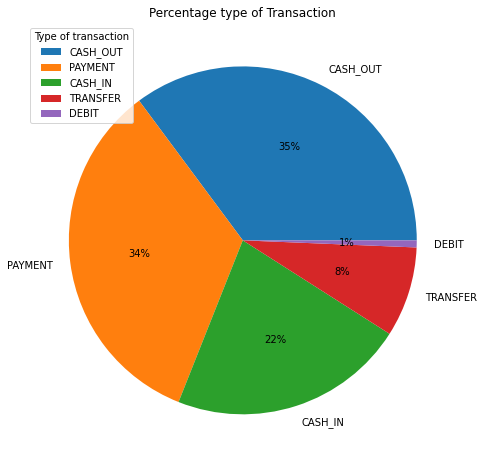

In [ ]:
type_transaction = df['type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(type_transaction.values, labels=type_transaction.index, autopct='%1.0f%%')
plt.title('Percentage type of Transaction')
plt.legend(loc='upper left', title = 'Type of transaction')
plt.show()

In [ ]:
print('The types of fraudulent transactions are {}'.format(list(df.loc[df['isFraud'] == 1]["type"].drop_duplicates().values))) 

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
dfFraudTransfer = df.loc[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
dfFraudCashout = df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


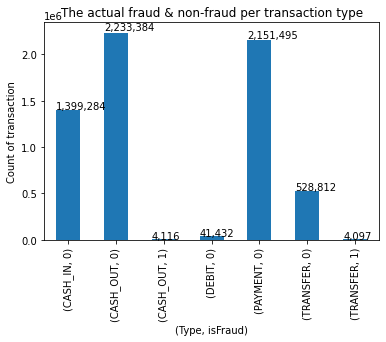

In [ ]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("The actual fraud & non-fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

It seem likes only TRANSFER and CASH_OUT transaction approximately have the same number of Fraud

## Looking balances before and after the transaction

2.4. Are there account labels common to fraudulent TRANSFERs and CASH_OUTs?

From the data description, the modus operandi for committing fraud involves first making a TRANSFER to a (fraudulent) account which in turn conducts a CASH_OUT. CASH_OUT involves transacting with a merchant who pays out cash. Thus, within this two-step process, the fraudulent account would be both, the destination in a TRANSFER and the originator in a CASH_OUT. However, the data shows below that there are no such common accounts among fraudulent transactions. Thus, the data is not imprinted with the expected modus-operandi.

In [ ]:
# dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
# dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('Within fraudulent transactions, are there destinations for TRANSFERS \
that are also originators for CASH_OUTs? {}'.format(\
(df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].nameDest.isin(df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].nameOrig)).any())) # False
dfNotFraud = df.loc[df.isFraud == 0]

Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [ ]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of \
genuine CASH_OUTs: \n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [ ]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas \
genuine CASH_OUT from this account occured earlier at step = {}'.format(\
dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == \
                           'C423543548')].step.values)) # 185


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [185]


However, 2 out of 3 of these accounts first make a genuine CASH_OUT and only later (as evidenced by the time step) receive a fraudulent TRANSFER. Thus, fraudulent transactions are not indicated by the nameOrig and nameDest features

Conclusion: Noting from section 2.3 above that the nameOrig and nameDest features neither encode merchant accounts in the expected way, below, we drop these features from the data since they are meaningless.

Conclusion:

Thus in this dataset, for fraudulent transactions, the account that received funds during a TRANSFER was not used at all for CASH OUT.

If that is the case, there seems to be no use for nameOrig or nameDest since there seems to be no restrictions on which accounts CASH OUT from fraudulent transactions.

Thus, I am omitting the nameOrig and nameDest columns from analysis.

## Time step (Hour) and Amount transactions

In [ ]:
df_Fraud = df.loc[df["isFraud"] == 1]
df_Valid = df.loc[df["isFraud"] == 0]

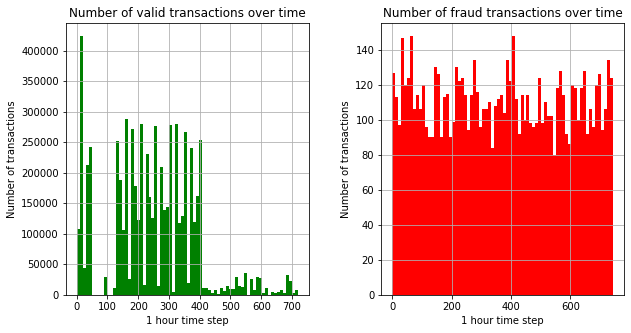

In [ ]:
bins = round(744 / 10) #I take total step per 10, its equivalent each 10 hours per column

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot histogram for valid transactions
df_Valid.hist(column="step", color="green", bins=bins, ax=axs[0])
axs[0].set_xlabel("1 hour time step")
axs[0].set_ylabel("Number of transactions")
axs[0].set_title("Number of valid transactions over time")

# plot histogram for fraud transactions
df_Fraud.hist(column="step", color="red", bins=bins, ax=axs[1])
axs[1].set_xlabel("1 hour time step")
axs[1].set_ylabel("Number of transactions")
axs[1].set_title("Number of fraud transactions over time")

plt.show()

There are stark difference between the step data between valid and fraud transactions.

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th hours.
The frequency at which fraudulent transactions occur does not seem to change much over time.

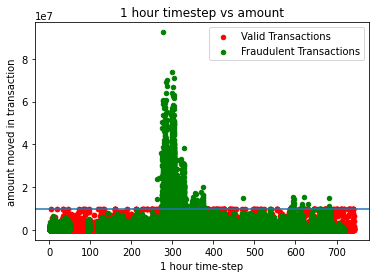

Proportion of transactions where the amount moved is greater than 10 million:  0.00038396132410862193


In [ ]:
# plotting overlayed step vs amount scatter plots
fig,ax = plt.subplots()
df_Fraud.plot.scatter(x="step",y="amount",color="red",ax=ax,label="Valid Transactions")
df_Valid.plot.scatter(x="step",y="amount",color="green",ax=ax, label="Fraudulent Transactions")

plt.title("1 hour timestep vs amount")
plt.xlabel("1 hour time-step")
plt.ylabel("amount moved in transaction")
plt.legend(loc="upper right")

# plotting a horizontal line to show where valid transactions behave very differently from fraud transactions
plt.axhline(y=1e7)
plt.show()

print("Proportion of transactions where the amount moved is greater than 10 million: ", \
      len(df[df.amount > 1e7])/len(df))

Only valid transaction involved amounts larger than 10,000,000, however these transactions make up less than 0.01% of the relevant data.

When the amounts moved is less than 10,000,000 there doesn't seem to be a large difference fraudulent and valid transactions.

# Modeling

In [ ]:
from statsmodels.tools import categorical

# 1. Keep only interested transaction type ('TRANSFER', 'CASH_OUT')
# 2. Drop some columns
# 3. Convert categorical variables to numeric variable
tmp = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])),:]
tmp.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
tmp = tmp.reset_index(drop=True)
a = np.array(tmp['type'])
b = categorical(a, drop=True)
tmp['type_num'] = b.argmax(1)

print(tmp.head(3))

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.9/dist-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


       type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER     181.00          181.0             0.0             0.0   
1  CASH_OUT     181.00          181.0             0.0         21182.0   
2  CASH_OUT  229133.94        15325.0             0.0          5083.0   

   newbalanceDest  isFraud  type_num  
0            0.00        1         1  
1            0.00        1         0  
2        51513.44        0         0  


<AxesSubplot:>

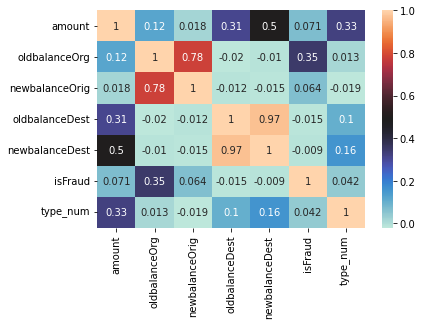

In [ ]:
sns.heatmap(tmp.corr(), annot = True, cmap = 'icefire')

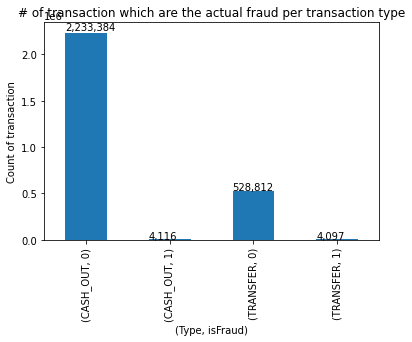

In [ ]:
ax = tmp.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

## Visualize skewed Features

In [ ]:
from sklearn import preprocessing
from scipy.stats import skew, boxcox

Text(10, 100000, 'Skewness: 0.08')

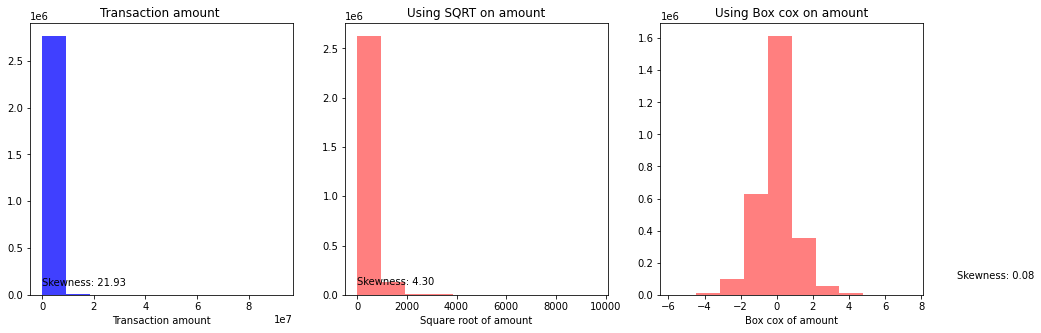

In [ ]:
tmp['amount_boxcox'] = preprocessing.scale(boxcox(tmp['amount']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(tmp['amount'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("Transaction amount") 
plt.title("Transaction amount ") 
plt.text(10,100000,"Skewness: {0:.2f}".format(skew(tmp['amount'])))

figure.add_subplot(132)
plt.hist(np.sqrt(tmp['amount']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of amount")
plt.title("Using SQRT on amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['amount']))))

figure.add_subplot(133)
plt.hist(tmp['amount_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of amount")
plt.title("Using Box cox on amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(tmp['amount_boxcox'])))

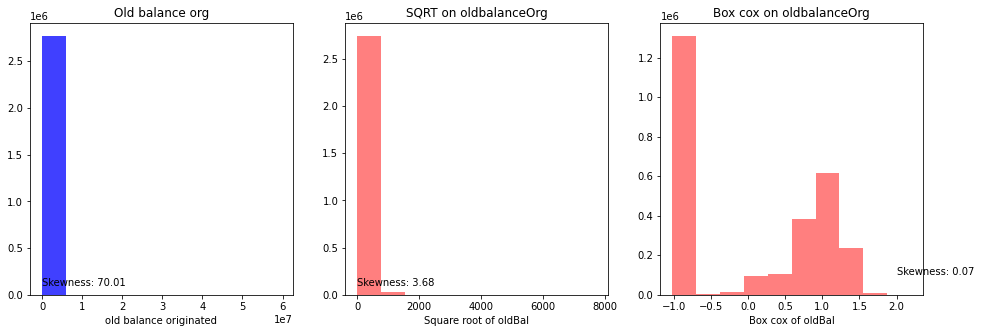

In [ ]:
tmp['oldbalanceOrg_boxcox'] = preprocessing.scale(boxcox(tmp['oldbalanceOrg']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(tmp['oldbalanceOrg'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("old balance originated") 
plt.title("Old balance org") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['oldbalanceOrg'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['oldbalanceOrg']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of oldBal")
plt.title("SQRT on oldbalanceOrg")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['oldbalanceOrg']))))

figure.add_subplot(133)
plt.hist(tmp['oldbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of oldBal")
plt.title("Box cox on oldbalanceOrg")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['oldbalanceOrg_boxcox'])))

plt.show()

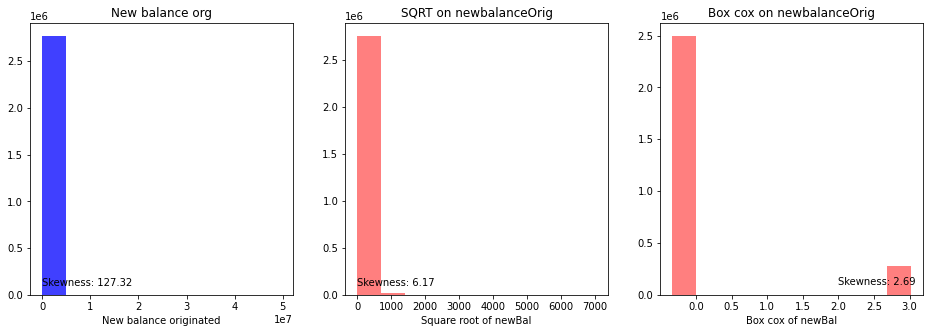

In [ ]:
tmp['newbalanceOrg_boxcox'] = preprocessing.scale(boxcox(tmp['newbalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(tmp['newbalanceOrig'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance originated") 
plt.title("New balance org") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['newbalanceOrig'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['newbalanceOrig']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['newbalanceOrig']))))

figure.add_subplot(133)
plt.hist(tmp['newbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['newbalanceOrg_boxcox'])))

plt.show()

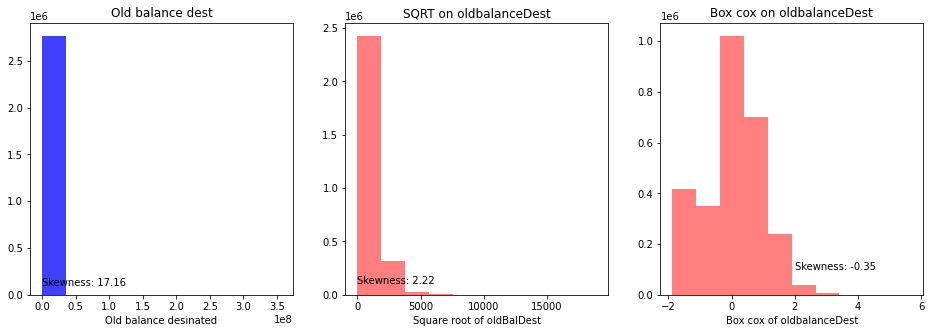

In [ ]:
tmp['oldbalanceDest_boxcox'] = preprocessing.scale(boxcox(tmp['oldbalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(tmp['oldbalanceDest'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("Old balance desinated") 
plt.title("Old balance dest") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['oldbalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['oldbalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of oldBalDest")
plt.title("SQRT on oldbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['oldbalanceDest']))))

figure.add_subplot(133)
plt.hist(tmp['oldbalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of oldbalanceDest")
plt.title("Box cox on oldbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['oldbalanceDest_boxcox'])))

plt.show()

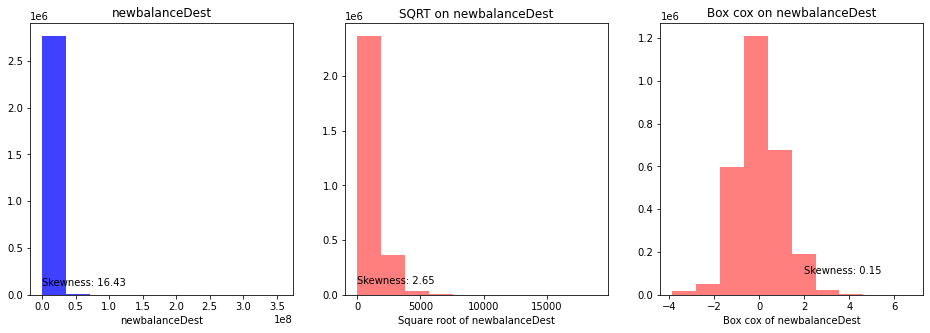

In [ ]:
tmp['newbalanceDest_boxcox'] = preprocessing.scale(boxcox(tmp['newbalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(tmp['newbalanceDest'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("newbalanceDest") 
plt.title("newbalanceDest") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['newbalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['newbalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newbalanceDest")
plt.title("SQRT on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['newbalanceDest']))))

figure.add_subplot(133)
plt.hist(tmp['newbalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newbalanceDest")
plt.title("Box cox on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['newbalanceDest_boxcox'])))

plt.show()

## Preprocessing

In [ ]:
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
#Creating a copy
paysim_1=df.copy()

#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=paysim_1['isFraud'].value_counts())])
fig.show()

In [ ]:
#Getting the max size
max_size = paysim_1['isFraud'].value_counts().max()

#Balancing the target label
lst = [paysim_1]
for class_index, group in paysim_1.groupby('isFraud'):
    lst.append(group.sample(max_size-len(group), replace=True))
paysim_1 = pd.concat(lst)

In [ ]:
#Checking the balanced target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=paysim_1['isFraud'].value_counts())])
fig.show()

In [ ]:
print("The fraud transaction of the filtered dataset: {}%".format((len(tmp[tmp.isFraud == 1])/len(tmp)) * 100))

The fraud transaction of the filtered dataset: 0.2964544224336551%


As can be seen, I have already filtered unrelated transaction type out and keep only relevant. There're only actual fraud of 0.3%. This is very imbalance data.

In this notebook, I will quickly use traditional under-sampling method (there are several other ways; under and over sampling, SMOTE, etc).

I will under sample the dataset by creating a 50-50 ratio of randomly selecting 'x' amount of sample from majority class, with 'x' being the total number of records with the minority class.

Also we will use only the boxcox data transformation for prediction.

In [ ]:
tmp

,isFraud,type_num,amount_boxcox,oldbalanceOrg_boxcox,newbalanceOrg_boxcox,oldbalanceDest_boxcox,newbalanceDest_boxcox
0,1,1,-4.096788,0.039564,-0.331128,-1.873353,-3.863134
1,1,0,-4.096788,0.039564,-0.331128,-0.917296,-3.863134
2,0,0,0.287913,0.856874,-0.331128,-1.191649,-1.591587
3,0,1,0.234287,0.297420,-0.331128,-0.904629,-3.863134
4,0,1,0.558130,0.795608,-0.331128,-1.156117,0.805223
...,...,...,...,...,...,...,...
2770404,1,0,0.635196,1.385510,-0.331128,-1.873353,-0.635274
2770405,1,1,3.698260,1.854172,-0.331128,-1.873353,-3.863134
2770406,1,0,3.698260,1.854172,-0.331128,-0.625282,1.545804
2770407,1,1,1.500422,1.535658,-0.331128,-1.873353,-3.863134


In [ ]:
tmp.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount', 'type'], axis=1, inplace=True)

X = tmp.iloc[:, tmp.columns != 'isFraud']
y = tmp.iloc[:, tmp.columns == 'isFraud']

In [ ]:
# Number of data points in the minority class
number_records_fraud = len(tmp[tmp.isFraud == 1])
fraud_indices = tmp[tmp.isFraud == 1].index.values

# Picking the indices of the normal classes
normal_indices = tmp[tmp.isFraud == 0].index

# Out of the indices we picked, randomly select "x" number (x - same as total fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = tmp.iloc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'isFraud']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'isFraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.isFraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.isFraud == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  16426


In [ ]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", format(len(X_train),',d'))
print("Number transactions test dataset: ", format(len(X_test), ',d'))
print("Total number of transactions: ", format(len(X_train)+len(X_test), ',d'))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", format(len(X_train_undersample),',d'))
print("Number transactions test dataset: ", format(len(X_test_undersample),',d'))
print("Total number of transactions: ", format(len(X_train_undersample)+len(X_test_undersample),',d'))

Number transactions train dataset:  1,939,286
Number transactions test dataset:  831,123
Total number of transactions:  2,770,409

Number transactions train dataset:  11,498
Number transactions test dataset:  4,928
Total number of transactions:  16,426


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

Recall metric in the testing dataset: 0.9590


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2490
           1       0.92      0.96      0.94      2438

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.94      4928
weighted avg       0.94      0.94      0.94      4928



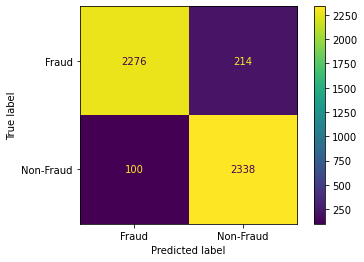

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

report = classification_report(y_test_undersample, y_pred_undersample)
print(report)
cm = confusion_matrix(y_test_undersample,y_pred_undersample)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


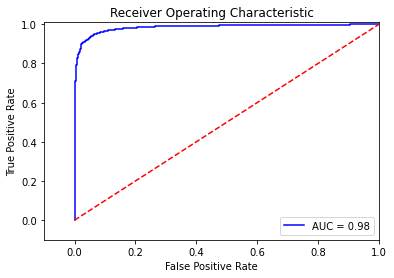

In [ ]:
lr = LogisticRegression()
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# correlation

<AxesSubplot:>

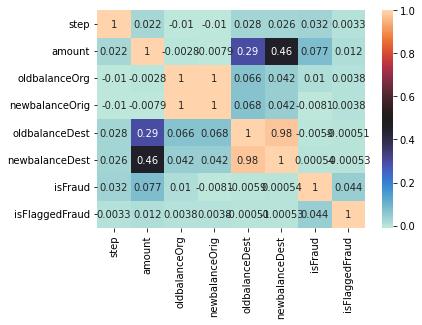

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap= 'icefire')

.2. What determines whether the feature isFlaggedFraud gets set or not?
It turns out that the origin of isFlaggedFraud is unclear, contrasting with the description provided. The 16 entries (out of 6 million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. The data is described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. In fact, as shown below, isFlaggedFraud can remain not set despite this condition being met.

In [ ]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                            # only 'TRANSFER'

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dfFlagged.amount.min())) # 353874.22

print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


In [ ]:
X = df.loc[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')]

Y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [ ]:
# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

3.1. Imputation of Latent Missing Values


In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.00,0.0,0.00,0.00
3,1,1,181.00,181.00,0.0,21182.00,0.00
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44
19,1,0,215310.30,705.00,0.0,22425.00,0.00
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00


In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


In [ ]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

In [ ]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan

In [ ]:
X 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.00,0.0,-1.00,-1.00
3,1,1,181.00,181.00,0.0,21182.00,0.00
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44
19,1,0,215310.30,705.00,0.0,22425.00,0.00
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00


In [ ]:
X['errorbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrig,errorbalanceDest
2,1,0,181.00,181.00,0.0,-1.00,-1.00,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,0.00,8.500025e+05


Visualization

In [ ]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


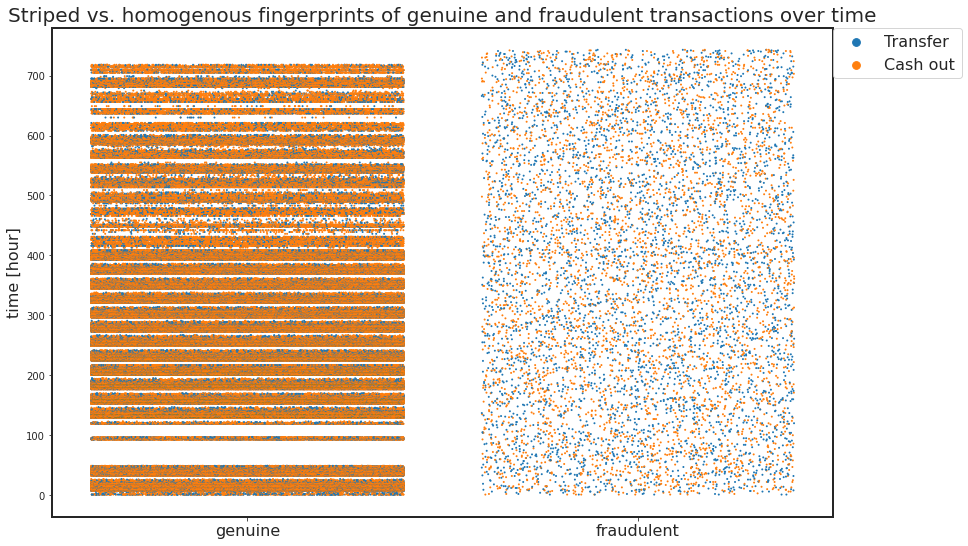

In [ ]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

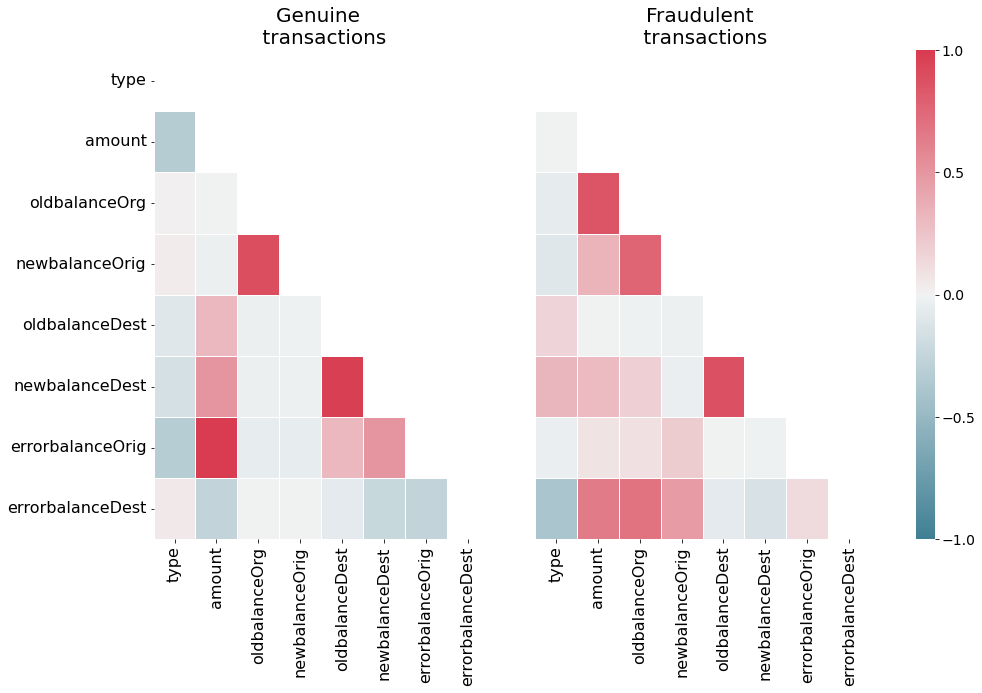

In [ ]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

# Machine Learning

In [ ]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))


skew = 0.002964544224336551


Selection of ML algorithm: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data.

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = 42)

In [ ]:
%%time
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9947127647996362
CPU times: user 4min 45s, sys: 694 ms, total: 4min 46s
Wall time: 2min 59s


The figure below shows that the new feature errorBalanceOrig that we created is the most relevant feature for the model. The features are ordered based on the number of samples affected by splits on those features.

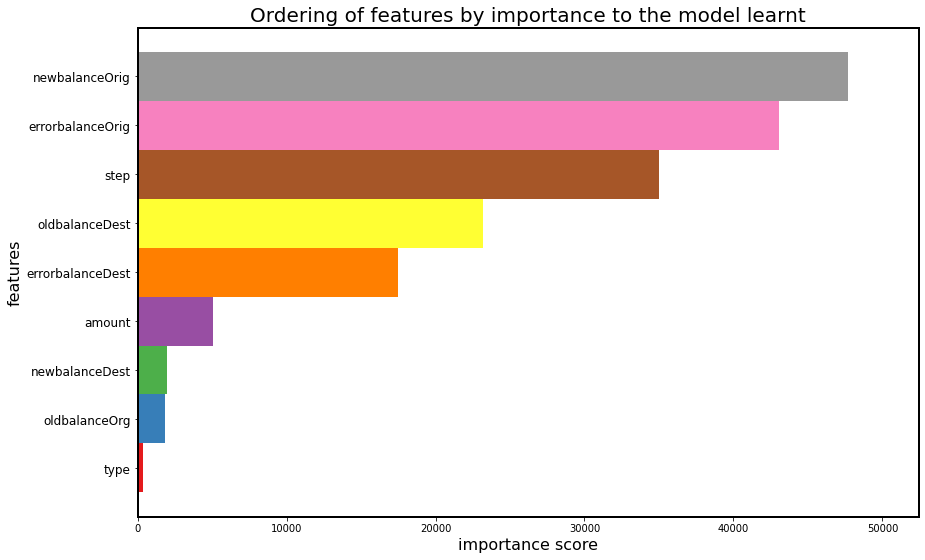

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

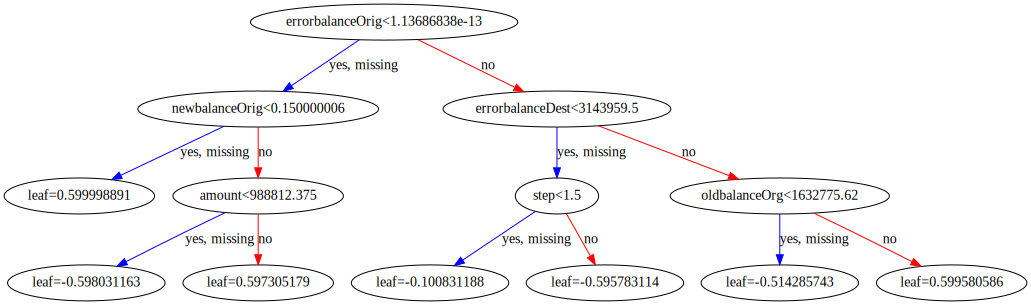

In [ ]:
to_graphviz(clf)

In [ ]:
%%time
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
                                         trainY, scoring = 'average_precision')

CPU times: user 53min 23s, sys: 7.53 s, total: 53min 30s
Wall time: 31min 46s


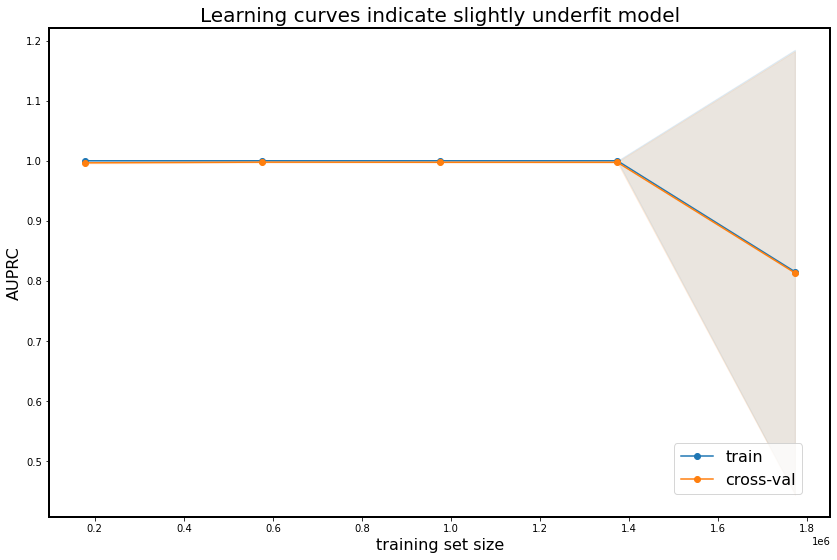

In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

# Conclusion

We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. To deal with the large skew in the data, we chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The method used in this kernel should therefore be broadly applicable to a range of such problems